## Loading Libraries and Dependencies

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
packages = c("tidyverse", "bootstrap")

## Check to see if package is available and load else install the package and its dependencies
package.check <- lapply(packages, FUN = function(x) {
  if (!require(x, character.only = TRUE)) {
    install.packages(x, dependencies = TRUE)
    library(x, character.only = TRUE)
  }
})

### Setup and Computations 

In [12]:
set.seed(5^13)

## Load Dataset
shhs1 <- read.csv('data/shhs1.txt', sep = '\t')

M <- 1000       #Monte Carlo samples 
alpha <- 0.95   #Confidence level

## Parameters for the weibull distribution
lambda <- 13
k <- 1          #shape parameter

x = rweibull(n, shape = k, scale = lambda)
sigma = sd(x)
xmed = median(x)
c(sigma, xmed)

[1] 15.08343 10.58429

### Bootstrap Percentil CI and Coverage Probability

#### 1. Bootstrap Percentile CI and Coverage Probability (n=100, R=1000)

In [13]:
n <- 100        #Sample size 
R <- 1000       #Bootstrap replications

#Two-sided bootstrap percentile confidence intervals for sigma and x_med
is_median <- 0
is_sd <- 0


CI_MED_left <- 0
CI_MED_right <- 0
CI_SD_left <- 0
CI_SD_right <- 0

for (j in 1:M) {
  weibull_samples <- rweibull(n, k, lambda)
  MED <- 0
  SD <- 0
  for (i in 1:R) {
    bootstrap_values <- sample(weibull_samples, n, replace = T)
    MED[i] <- median(bootstrap_values)
    SD[i] <- sd(bootstrap_values)
  }
  
  MED <- sort(MED)
  SD <- sort(SD)
  
  CI_MED_left[j] <- MED[floor(R * (1-alpha))/2]
  CI_MED_right[j] <- MED[floor(R * (1-(1-alpha)/2))]
  CI_SD_left[j] <- SD[floor(R * (1-alpha))/2]
  CI_SD_right[j] <- SD[floor(R * (1-(1-alpha)/2))]
    
  CIs <- data.frame(CI_MED_left, CI_MED_right, CI_SD_left, CI_SD_right)
    
}

CIs <- CIs %>% 
  mutate(is_median = xmed >= CI_MED_left & xmed <= CI_MED_right)

CIs <- CIs %>% 
  mutate(is_sd = sigma >= CI_SD_left & sigma <= CI_SD_right)

## Coverage probability
coverage_prob <- c(sum(CIs$is_median)/ M, sum(CIs$is_sd)/M)

## Average interval length
average_interval_length <- c(sum(CIs$CI_MED_right - CIs$CI_MED_left)/nrow(CIs), 
                             sum(CIs$CI_SD_right - CIs$CI_SD_left)/nrow(CIs))

c(coverage_prob, average_interval_length)

[1] 0.783000 0.578000 5.067826 6.077912

#### 2. Bootstrap Percentile CI and Coverage Probability (n=R=1000)

In [14]:
n <- 1000        #Sample size 
R <- 1000       #Bootstrap replications

#Two-sided bootstrap percentile confidence intervals for sigma and x_med
is_median <- 0
is_sd <- 0


CI_MED_left <- 0
CI_MED_right <- 0
CI_SD_left <- 0
CI_SD_right <- 0

for (j in 1:M) {
  weibull_samples <- rweibull(n, k, lambda)
  MED <- 0
  SD <- 0
  for (i in 1:R) {
    bootstrap_values <- sample(weibull_samples, n, replace = T)
    MED[i] <- median(bootstrap_values)
    SD[i] <- sd(bootstrap_values)
  }
  
  MED <- sort(MED)
  SD <- sort(SD)
  
  CI_MED_left[j] <- MED[floor(R * (1-alpha))/2]
  CI_MED_right[j] <- MED[floor(R * (1-(1-alpha)/2))]
  CI_SD_left[j] <- SD[floor(R * (1-alpha))/2]
  CI_SD_right[j] <- SD[floor(R * (1-(1-alpha)/2))]
    
  CIs <- data.frame(CI_MED_left, CI_MED_right, CI_SD_left, CI_SD_right)
    
}

CIs <- CIs %>% 
  mutate(is_median = xmed >= CI_MED_left & xmed <= CI_MED_right)

CIs <- CIs %>% 
  mutate(is_sd = sigma >= CI_SD_left & sigma <= CI_SD_right)

## Coverage probability
coverage_prob <- c(sum(CIs$is_median)/ M, sum(CIs$is_sd)/M)

## Average interval length
average_interval_length <- c(sum(CIs$CI_MED_right - CIs$CI_MED_left)/nrow(CIs), 
                             sum(CIs$CI_SD_right - CIs$CI_SD_left)/nrow(CIs))

c(coverage_prob, average_interval_length)

[1] 0.041000 0.081000 1.620234 2.202459

#### 3. Bootstrap Percentile CI and Coverage Probability (n=100, R=5000)

In [15]:
n <- 100        #Sample size 
R <- 5000       #Bootstrap replications

#Two-sided bootstrap percentile confidence intervals for sigma and x_med
is_median <- 0
is_sd <- 0


CI_MED_left <- 0
CI_MED_right <- 0
CI_SD_left <- 0
CI_SD_right <- 0

for (j in 1:M) {
  weibull_samples <- rweibull(n, k, lambda)
  MED <- 0
  SD <- 0
  for (i in 1:R) {
    bootstrap_values <- sample(weibull_samples, n, replace = T)
    MED[i] <- median(bootstrap_values)
    SD[i] <- sd(bootstrap_values)
  }
  
  MED <- sort(MED)
  SD <- sort(SD)
  
  CI_MED_left[j] <- MED[floor(R * (1-alpha))/2]
  CI_MED_right[j] <- MED[floor(R * (1-(1-alpha)/2))]
  CI_SD_left[j] <- SD[floor(R * (1-alpha))/2]
  CI_SD_right[j] <- SD[floor(R * (1-(1-alpha)/2))]
    
  CIs <- data.frame(CI_MED_left, CI_MED_right, CI_SD_left, CI_SD_right)
    
}

CIs <- CIs %>% 
  mutate(is_median = xmed >= CI_MED_left & xmed <= CI_MED_right)

CIs <- CIs %>% 
  mutate(is_sd = sigma >= CI_SD_left & sigma <= CI_SD_right)

## Coverage probability
coverage_prob <- c(sum(CIs$is_median)/ M, sum(CIs$is_sd)/M)

## Average interval length
average_interval_length <- c(sum(CIs$CI_MED_right - CIs$CI_MED_left)/nrow(CIs), 
                             sum(CIs$CI_SD_right - CIs$CI_SD_left)/nrow(CIs))

c(coverage_prob, average_interval_length)

[1] 0.819000 0.574000 5.113565 6.079199

### Bootstrap Accelerated Bias-Corrected Interval

#### 1. Using the Median

In [16]:
CI_MED_left <- rep(0, M)
CI_MED_right <- rep(0, M)
z_MED <- 0
a.0_MED <- 0

for (j in 1:M) {
  weibull_samples <- rweibull(100, k, l)
  A <- bcanon(weibull_samples, R, theta = median, alpha = c(0.025, 0.975))
  z_MED[j] <- A$z0
  a.0_MED[j] <- A$acc
  CI_MED_left[j] <- A$confpoints[1,2]
  CI_MED_right[j] <- A$confpoints[2,2]
}

df_bca_point_MED <- data.frame(CI_MED_left, CI_MED_right)

df_bca_point_MED <- df_bca_point_MED %>% 
  mutate(is_median = xmed >= CI_MED_left & xmed <= CI_MED_right)

ERROR: Error in rweibull(100, k, l): object 'l' not found


#### 2. Using the Standard Deviation

In [ ]:
CI_SD_left <- 0
CI_SD_right <- 0
z_SD <- 0
a.0_SD <- 0
for (j in 1:M) {
  sample_weibull <- rweibull(100, k, l)
  A <- bcanon(sample_weibull, R, theta = sd, alpha = c(0.025, 0.975))
  z_SD[j] <- A$z0
  a.0_SD[j] <- A$acc
  CI_SD_left[j] <- A$confpoints[1,2]
  CI_SD_right[j] <- A$confpoints[2,2]
}

df_bca_point_SD <- data.frame(CI_SD_left, CI_SD_right)

df_bca_point_SD <- df_bca_point_SD %>% 
  mutate(is_sd = sigma >= CI_SD_left & sigma <= CI_SD_right)

#### 3. Summary Statistics

In [ ]:
## Aggregate computed statistics into dataframe
estim <-  data.frame(z_SD, a.0_SD, z_MED, a.0_MED)
statistics <- data.frame(df_bca_point_MED, df_bca_point_SD) 

## Coverage Probability
coverage_prob <- c(sum(statistics$is_median)/M, sum(statistics$is_sd)/M)

#Average interval length
average_interval_length <- c(sum(statistics$CI_MED_right - statistics$CI_MED_left)/nrow(statistics), 
                             sum(statistics$CI_SD_right - statistics$CI_SD_left)/nrow(statistics))

c(mean(z_SD),mean(a.0_SD), mean(z_MED), mean(a.0_MED))

### Analysis of Respiratory Disturbance Index

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


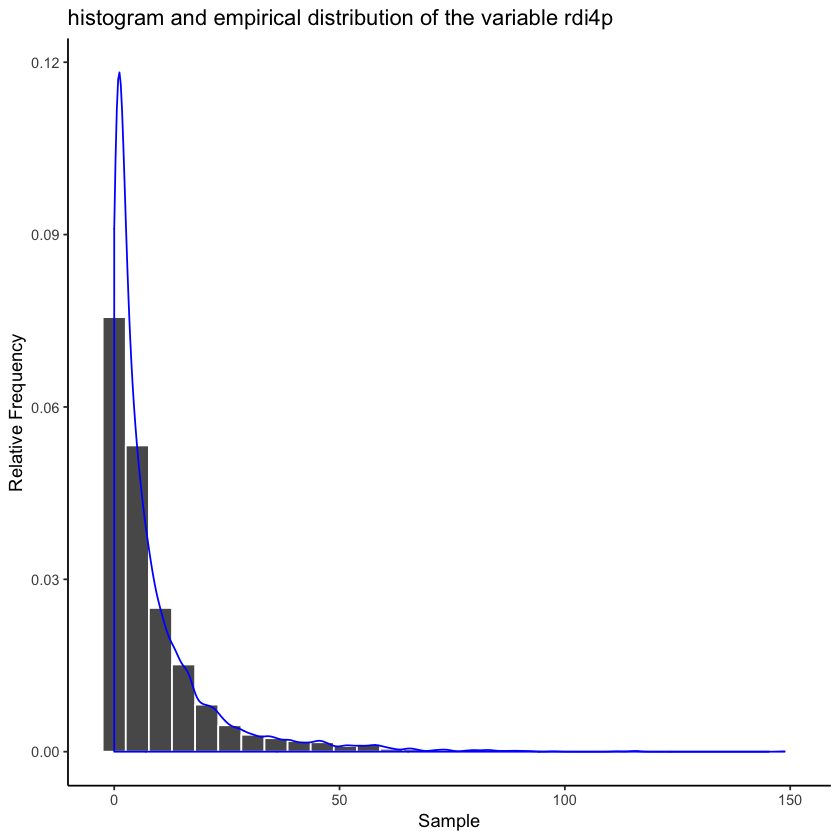

In [10]:
#histogram and empirical distribution of the variable rdi4p
ggplot(shhs1, aes(x = rdi4p, y = ..density..)) +
  geom_histogram(color = 'white') +
  geom_density(aes(x = rdi4p), colour = "blue") + labs(title = "histogram and empirical distribution of the variable rdi4p",
                                                        x = "Sample",y = "Relative Frequency", colour = "Method") + theme_classic()


In [ ]:
#bootstrap percentile (two-sided) confidence intervals for the standard deviation and median
rdi4p.med <- median(shhs1$rdi4p)
rdi4p.sigma <- sd(shhs1$rdi4p)
alpha <- 0.95

n <- length(shhs1$rdi4p) #sample size
R <- 1000 #number of bootstraps replicantions

MED <- 0
SD <- 0
for (i in 1:R) {
  bootstrap_values <- sample(shhs1$rdi4p, n, replace = T)
  MED[i] <- median(bootstrap_values)
  SD[i] <- sd(myBootbootstrap_valuesstrap)
}

MED <- sort(MED)
SD <- sort(SD)
CI_MED_left <- MED[floor(R *(1-alpha))/2]
CI_MED_right <- MED[floor(R *(1-(1-alpha)/2))]
CI_SD_left <- SD[floor(R *(1-alpha))/2]
CI_SD_right <- SD[floor(R *(1-(1-alpha)/2))]

boostrap_percentile_CI <- data.frame(CI_MED_left, CI_MED_right, CI_SD_left, CI_SD_right)
is_median <- rdi4p.med >= CI_MED_left & rdi4p.med <= CI_MED_right
is_sd <- rdi4p.sigma >= CI_SD_left & rdi4p.sigma <= CI_SD_right

In [ ]:
#Bootstrap accelerated bias-corrected confidence intervals 

# Median
rdi4p.median.rem <- shhs1$rdi4p [! shhs1$rdi4p %in% median(shhs1$rdi4p)]
A <- bcanon(rdi4p.median.rem, R, theta = median, alpha = c(0.025, 0.975))
z_MED <- A$z0
a.0_MED <- A$acc
CI_MED_left <- A$confpoints[1,2]
CI_MED_right <- A$confpoints[2,2]

is_median_A = rdi4p.med >= CI_MED_left & rdi4p.med <= CI_MED_right

In [ ]:
# Standard deviation
A <- bcanon(shhs1$rdi4p, R, theta = sd, alpha = c(0.025, 0.975))
z_SD <- A$z0
a.0_SD <- A$acc
CI_SD_left <- A$confpoints[1,2]
CI_SD_right <- A$confpoints[2,2]

is_sd_A = rdi4p.sigma >= CI_SD_left & rdi4p.sigma <= CI_SD_right

BCa_CI <- data.frame(CI_MED_left, CI_MED_right, CI_SD_left, CI_SD_right, z_MED, a.0_MED, z_SD, a.0_SD)